# Apollo3 AEP Capture Analyzer
This notebook communicates to Apollo3 EVB running the PDM capture and algos output.

The results are read back through the UART.

In [1]:
import serial
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
%matplotlib notebook

from scipy import signal
import matplotlib.pyplot as plt

# Open Serial Port
Run this cell once (per kernel)

In [18]:
port = '/dev/tty.usbmodem0004830870831'

serialPort = serial.Serial(port = port, baudrate=115200,
                           bytesize=8, timeout=2, stopbits=serial.STOPBITS_ONE)

Get PCM samples from Apollo 3

In [62]:
serialString = ""     # Used to hold data coming over UART
line = ""             # Used to hold decoded Ascii

captureEnabled=False  # Set True when first sample comes in, and False after last sample 

samples = np.array([])

while(1):

    # Wait until there is data waiting in the serial buffer
    if(serialPort.in_waiting > 0):

        # Read data out of the buffer until a carraige return / new line is found
        serialString = serialPort.readline()

        # Decode Ascii
        line = serialString.decode('Ascii')
        
        # remove newlines
        line = line.rstrip()
        

        if 'The end of data transfer...' in line:
            captureEnabled = False;
            break;
        
        if captureEnabled:
            samples = np.append(samples, np.array(line.split(' ')).astype(np.int))
            
        else:
            # Print the contents of the serial data (when capture is disabled)
            print(line)
            
        if 'Audio recording is terminated and data starts to upload:' in line:
            captureEnabled = True;
  

        # Tell the device connected over the serial port that we recevied the data!
        # The b at the beginning is used to indicate bytes!
        #serialPort.write(b"Thank you for sending data \r\n")

print('\n############################################\n')
print('Samples captured (N = %d)' % (len(samples)))
#print('Min = %d' % np.min(samples))
#print('Max = %d' % np.max(samples))
#samples 


Start to record audio in 2 secs...

Audio recording is terminated and data starts to upload:

############################################

Samples captured (N = 48000)


We only take received samples to analyze left and right channel data

In [63]:
Fs = 16000
t_slice = 3
fft_len = Fs*t_slice

#Left_mic_data = np.array([])
#Right_mic_data = np.array([])

#for i in range(Fs*t_slice):
#    Left_mic_data = np.append(Left_mic_data, samples[i*2])
#    Right_mic_data = np.append(Right_mic_data, samples[i*2+1])

ipd.Audio(data=samples, rate=16000.)


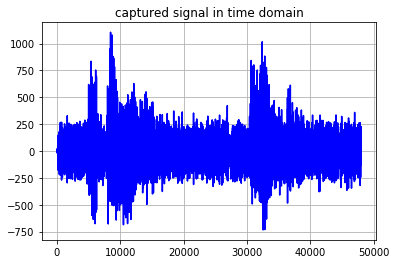

In [64]:
fig = plt.figure()
plt.title("captured signal in time domain")
plt.plot(samples[:], 'b')

#plt.plot(apollo_digital_filter_output, 'r')
#plt.legend(('original', 'filtered'), loc='best')
plt.grid(True)
plt.show()


Frequency domain analysis

In [ ]:
freq_indx = np.fft.rfftfreq(fft_len, d=1./Fs)
freq_bins_samples = np.fft.rfft(samples)
#freq_bins_right = np.fft.rfft(Right_mic_data)
fig = plt.figure()
plt.title("frequency bins of captured signal")
plt.plot(freq_indx[1:], np.abs(freq_bins_samples[1:]), 'b')
#plt.xlim(0,990)
#plt.ylim(0, 100000)
#plt.plot(freq_indx[1:], np.abs(freq_bins_right[1:]), 'r')
#plt.plot(apollo_digital_filter_output, 'r')
#plt.legend(('original', 'filtered'), loc='best')
plt.grid(True)
plt.show()